In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
img_size = (224, 224)

In [6]:
datadir = '/content/drive/MyDrive/ml project/pneumonia/test'
categories = ['normal', 'pneumonia']
test = []

for category in categories:
  path = os.path.join(datadir, category)
  class_num = categories.index(category)
  for img in tqdm(os.listdir(path)):
    img_array = cv2.imread(os.path.join(path,img))
    new_array = cv2.resize(img_array, img_size)
    test.append([new_array, class_num])

100%|██████████| 399/399 [00:13<00:00, 28.87it/s]


In [7]:
random.shuffle(test)

In [8]:
X_test = []
y_test = []

for features, labels in tqdm(test):
  X_test.append(features)
  y_test.append(labels)

X_test = np.array(X_test)
y_test = np.array(y_test)

100%|██████████| 633/633 [00:00<00:00, 908311.47it/s]


In [9]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/ml project/pneumonia/vgg16.h5')

In [10]:
y_pred = model.predict(X_test)

20/20 [==============================] - 16s 383ms/step


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [12]:
y_pred = y_pred.reshape(-1)
y_pred.shape

(633,)

In [13]:
for i in range(y_pred.shape[0]):
  if y_pred[i]>0.8:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       234
           1       0.90      0.97      0.93       399

    accuracy                           0.91       633
   macro avg       0.92      0.89      0.90       633
weighted avg       0.91      0.91      0.91       633



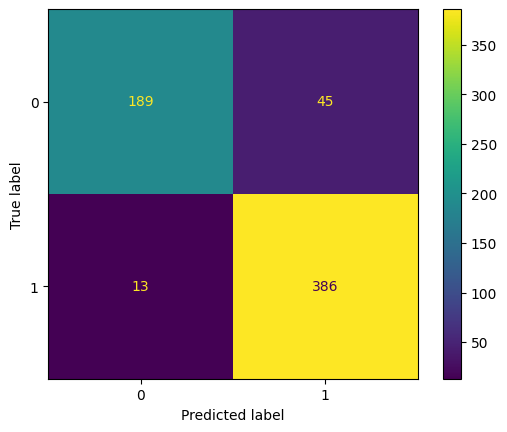

In [15]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/ml project/pneumonia/resnet50.h5')

In [17]:
y_pred = model.predict(X_test)

20/20 [==============================] - 6s 176ms/step


In [18]:
y_pred = y_pred.reshape(-1)
y_pred.shape

(633,)

In [19]:
for i in range(y_pred.shape[0]):
  if y_pred[i]>0.8:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       234
           1       0.88      0.95      0.92       399

    accuracy                           0.89       633
   macro avg       0.89      0.87      0.88       633
weighted avg       0.89      0.89      0.89       633



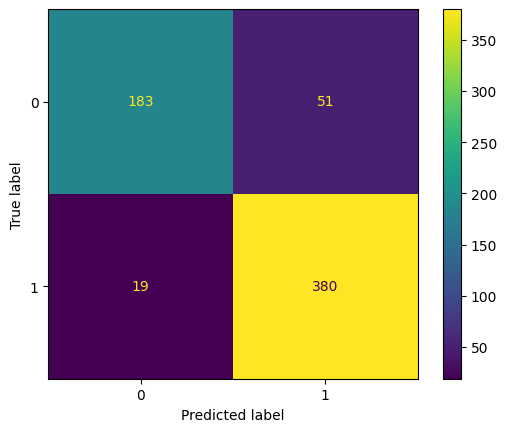

In [21]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [22]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/ml project/pneumonia/mobilenetv3.h5')

In [23]:
y_pred = model.predict(X_test)

20/20 [==============================] - 3s 70ms/step


In [24]:
y_pred = y_pred.reshape(-1)
y_pred.shape

(633,)

In [25]:
for i in range(y_pred.shape[0]):
  if y_pred[i]>0.8:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       234
           1       0.89      0.94      0.91       399

    accuracy                           0.89       633
   macro avg       0.89      0.87      0.88       633
weighted avg       0.89      0.89      0.89       633



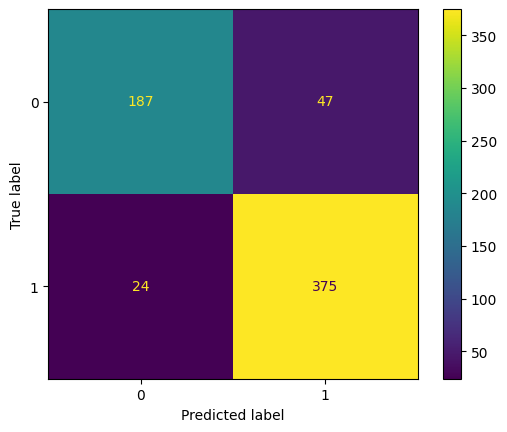

In [27]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()